Lab Group: Lianhe Chu, Jie Zhong

2. Word2Vec
    1. You have got the code to train word embedding using neural networks.
    2. The code also estimates the performance on TOEFL task
    3. Get the performance of the model for three different dimensionalities. The
    choice of dimensionalities is on your own but use different values (e.g.,
    10, 100, 1000).
    4. If your computational resources allow run simulations several times (e.g.
    5) for each dimensionality
    5. Report the accuracy on TOEFL for all simulations
    6. Elaborate how accuracy changes with the dimensionality

In [1]:
import gensim
import logging
import numpy as np
import nltk
import matplotlib.pyplot as plt
import matplotlib
from gensim import models
 

import help_functions as hf  

from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

In [2]:
# Download NLTK resources
nltk.download("wordnet")
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\A495502\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\A495502\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

https://www.nltk.org/data.html

# Dimension: 10, 40, 70, 100, 250, 500, 750, 1000

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\A495502\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2024-11-25 15:35:21,611 : INFO : Training Word2Vec model with dimension 10...
2024-11-25 15:35:21,627 : INFO : collecting all words and their counts
2024-11-25 15:35:21,628 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-11-25 15:35:21,628 : INFO : PROGRESS: at sentence #10000, processed 112555 words, keeping 6354 word types
2024-11-25 15:35:21,658 : INFO : PROGRESS: at sentence #20000, processed 254983 words, keeping 10821 word types
2024-11-25 15:35:21,670 : INFO : PROGRESS: at sentence #30000, processed 367772 words, keeping 12635 word types
2024-11-25 15:35:21,689 : INFO : PROGRESS: at sentence #40000, processed 566573 words, keeping 17685 word types
2024-11-25 15:35:21,705 : INFO : PROGRESS: at sentence #50000, processed 724294 words, keeping 20496 word types
2024-11-25 15:35:21,724 : INFO : PR

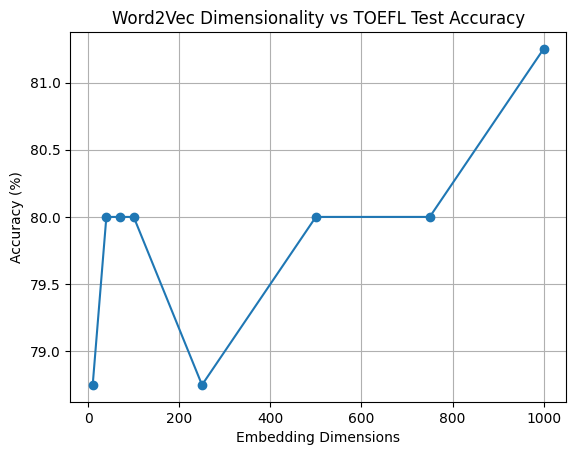

In [5]:
import logging
import gensim
import nltk
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

def train_word2vec(dim, sentences):
    model = gensim.models.Word2Vec(sentences, min_count=1, sample=0.00055, sg=1, vector_size=dim)
    return model

def run_toefl_test(model, lemmatizer, tests_file, num_tests=80):
    correct_answers = 0
    skipped_tests = 0

    for i in range(num_tests):
        line = tests_file.readline()
        if not line:
            break  # Stop if there are no more lines in the file

        words = line.split()
        try:
            # Lemmatize all words once
            words = [lemmatizer.lemmatize(word, pos) for word in words for pos in ('v', 'n', 'a')]

            # Generate vectors, using random vectors for missing words
            vectors = [model.wv[word] if word in model.wv else np.random.randn(model.vector_size) for word in words[:5]]

            # Evaluate the answer using a helper function (assumed to exist)
            correct_answers += hf.get_answer_mod(vectors)

        except (KeyError, IndexError):
            skipped_tests += 1
            logging.warning(f"Skipped test {i}: Line: {words}")

    accuracy = 100 * correct_answers / num_tests
    return accuracy, skipped_tests

# Main 
def main():
    nltk.download('wordnet')  
    lemmatizer = nltk.WordNetLemmatizer()

    # Load training sentences
    try:
        sentences = [line.split() for line in open("lemmatized.text", "r")]
    except FileNotFoundError:
        logging.error("lemmatized.text file not found.")
        return

    # Set dimensions and prepare results logging
    dimensions = [10, 40, 70, 100, 250, 500, 750, 1000]
    results = []

    for dim in dimensions:
        logging.info(f"Training Word2Vec model with dimension {dim}...")
        seed = np.random.randint(0, 10000)  # Random seed for independence
        model = train_word2vec(dim, sentences)

        try:
            with open('new_toefl.txt', 'r') as tests_file:
                accuracy, skipped_tests = run_toefl_test(model, lemmatizer, tests_file)
                results.append((dim, accuracy, skipped_tests))
                logging.info(f"Dimension {dim}: Accuracy: {accuracy}%, Skipped: {skipped_tests} tests")
        except FileNotFoundError:
            logging.error("new_toefl.txt file not found.")
            return
        

    '''
    # Save results to a CSV
    with open("results.csv", "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["Dimension", "Accuracy (%)", "Skipped Tests"])
        writer.writerows(results)
    '''

    # Plot results
    dimensions, accuracies, _ = zip(*results)
    plt.plot(dimensions, accuracies, marker='o')
    plt.xlabel('Embedding Dimensions')
    plt.ylabel('Accuracy (%)')
    plt.title('Word2Vec Dimensionality vs TOEFL Test Accuracy')
    plt.grid()
    #plt.savefig("results_plot.png")  # Save the plot as an image
    plt.show()

if __name__ == "__main__":
    main()


# Report the accuracy on TOEFL for all simulations

The result from the above simulations and the plot:
Dimension 10: Accuracy: 78.75%, Skipped: 0 tests
Dimension 40: Accuracy: 80.0%, Skipped: 0 tests
Dimension 70: Accuracy: 80.0%, Skipped: 0 tests
Dimension 100: Accuracy: 80.0%, Skipped: 0 tests
Dimension 250: Accuracy: 78.75%, Skipped: 0 tests
Dimension 500: Accuracy: 80.0%, Skipped: 0 tests
Dimension 750: Accuracy: 80.0%, Skipped: 0 tests
Dimension 1000: Accuracy: 81.25%, Skipped: 0 tests

# Elaborate how accuracy changes with the dimensionality

* The accuracy increases with dimensionality, but with a marginal improvement.
* The peak accuracy achieved with dimension 1000 in our simulations.
